In [ ]:
#Gather Data

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
boston_dataset = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
dir(boston_dataset) #Here 'target' is what i will predict

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [ ]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
boston_dataset.feature_names #All parametrs

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
boston_dataset.data #Data without Names

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
boston_dataset.target #Prices(xx.x..thousands) of houses which I will predict

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
#Here I created pandas dataframe
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

#Add column with price (target)
data['PRICE'] = boston_dataset.target

In [ ]:
data.head() #Let's look to the top rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
#Checking for missing values(NaN)
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [ ]:
data.info() #Сheck for the second time

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


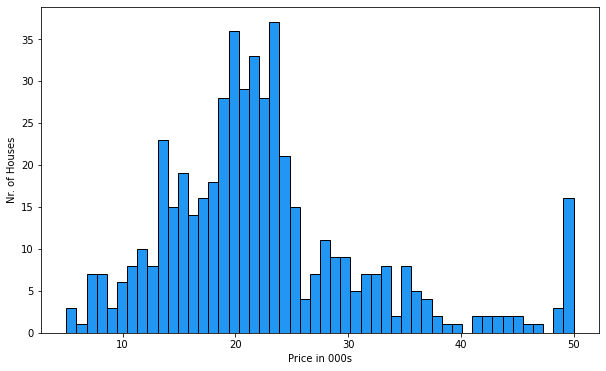

In [ ]:
#Let's vizualize our data: price and its distribution
plt.figure(figsize=(10, 6))
plt.hist(data['PRICE'], bins=50, ec='black', color='#2196f3')
plt.xlabel('Price in 000s')
plt.ylabel('Nr. of Houses')
plt.show()
#Does not comply with the law of uniform distribution. That's bad!
#"https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5"

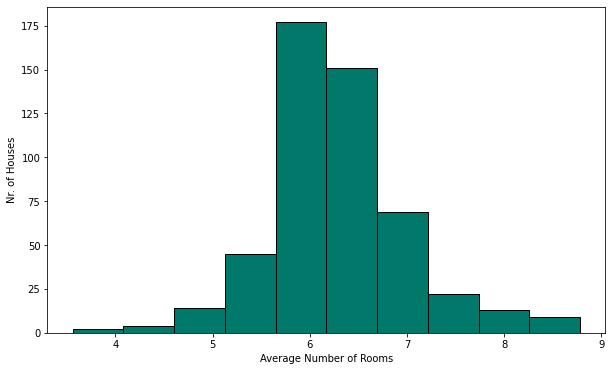

In [ ]:
#Let's vizualize our data: average number of rooms
plt.figure(figsize=(10, 6))
plt.hist(data['RM'], ec='black', color='#00796b')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Nr. of Houses')
plt.show()

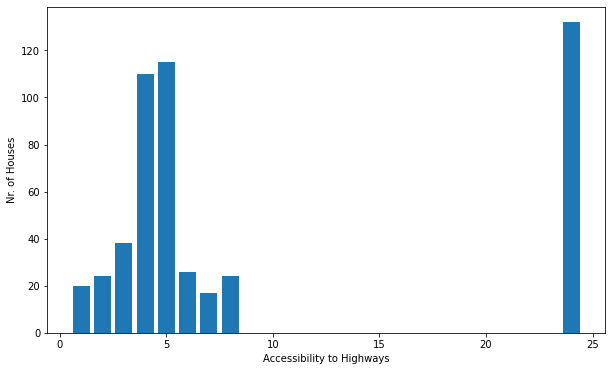

In [ ]:
#let's vizualize index of Accessibility to Highways
frequency = data['RAD'].value_counts()
plt.figure(figsize=(10, 6))
plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr. of Houses')
plt.bar(frequency.index, height=frequency) #Bar Chart: Дискретная вел. - это случайная величина, множество значений которой конечно или счётно.
plt.show()

In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
#Let's see to the correlation. The closer to zero the worse [-1:1]
data['PRICE'].corr(data['RM'])

0.6953599470715393

In [ ]:
data['PRICE'].corr(data['PTRATIO']) #Отношение кол-во учеников в классе к кол-ву учителей

-0.5077866855375616

In [ ]:
data.corr() #All correlations of all features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

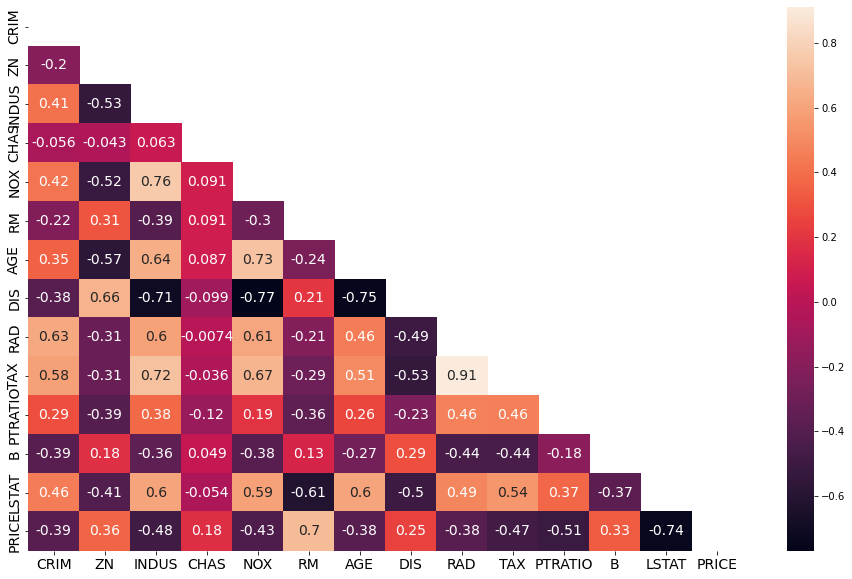

In [ ]:
# Vizualize corr
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
# Корреляция между нашими параметрами и ценой должна быть хорошей. Абсолют.значение значение корр. должна быть ближе к единице. Высокая корреляция между ценой и парамером должна быть, а не параметром и параметром
# Если так(взаимосвязаны) то это плохо (мульти-коррелиальность), надо избегать
# High corr DIS and AGE, DIS and NOX

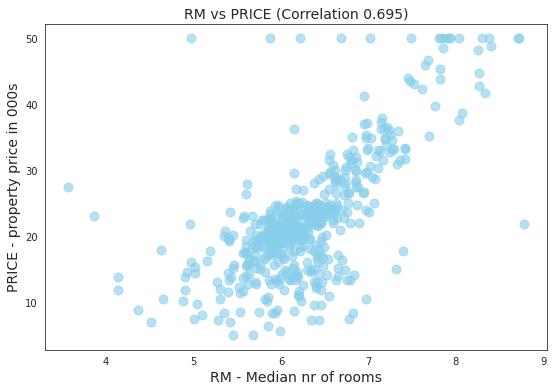

In [ ]:
rm_target_corr = round(data['RM'].corr(data['PRICE']), 3)

plt.figure(figsize=(9, 6))
plt.scatter(x=data['RM'], y=data['PRICE'], alpha=0.6, s=80, color='skyblue')

plt.title(f'RM vs PRICE (Correlation {rm_target_corr})', fontsize=14)
plt.xlabel('RM - Median nr of rooms', fontsize=14)
plt.ylabel('PRICE - property price in 000s', fontsize=14)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


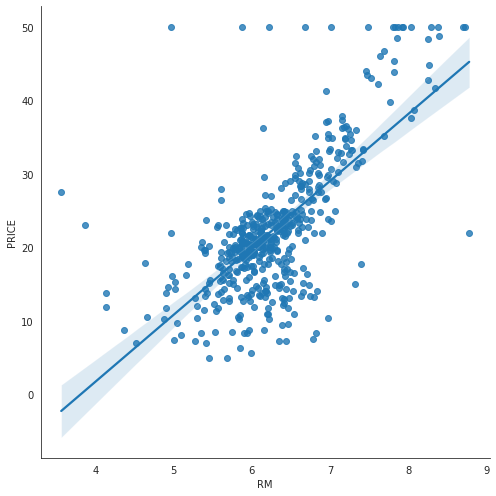

In [ ]:
sns.lmplot(x='RM', y='PRICE', data=data, size=7)
plt.show()

In [ ]:
prices = data['PRICE']
features = data.drop('PRICE', axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)


print('Training data r-squared:', model.score(x_train, y_train))
print('Test data r-squared:', model.score(x_test, y_test))

print('Intersept', model.intercept_)
pd.DataFrame(data=model.coef_, index=x_train.columns, columns=['coef'])

Training data r-squared: 0.750121534530608
Test data r-squared: 0.6709339839115651
Intersept 36.533051382824596


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [ ]:
#Трансформируем цены
#Переведём цены в логарифмы
#Все огромные значения будут нивелироваными логарифмами, то есть насколько высока цена настолько она будет нивелирована
#Распределие станет более нормальным(будет соответствовать закону нор.распред)
data['PRICE'].skew()

1.1080984082549072

In [ ]:
data['PRICE'].min

<bound method NDFrame._add_numeric_operations.<locals>.min of 0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64>

In [ ]:
y_log = np.log(data['PRICE'])

y_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64

In [ ]:
y_log.skew()

-0.33032129530987864

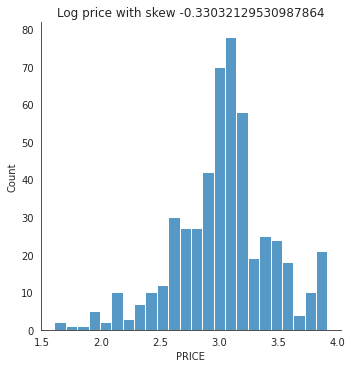

In [ ]:
sns.displot(y_log)
plt.title(f'Log price with skew {y_log.skew()}')
plt.show()

In [ ]:
prices = np.log(data['PRICE']) #Log prices
features = data.drop('PRICE', axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

model = LinearRegression()
model.fit(x_train, y_train)


print('Training data r-squared:', model.score(x_train, y_train))
print('Test data r-squared:', model.score(x_test, y_test))

print('Intersept', model.intercept_)
pd.DataFrame(data=model.coef_, index=x_train.columns, columns=['coef'])

Training data r-squared: 0.7930234826697583
Test data r-squared: 0.7446922306260735
Intersept 4.059943871775192


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [ ]:
# Выкидываем ненужные параметры
# p-value - значение статистической важности, насколько параметр важен
# VIF (Мультиколинеарность - насколько параметр связан от др параметров)
# "https://medium.com/analytics-vidhya/variance-inflation-factor-vif-c0a39522114e"

x_const = sm.add_constant(x_train)

model_1 = sm.OLS(y_train, x_const)
results = model_1.fit()

#res of pval
# если пи-вал больше 5% то параметр под сомнением
pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,coef,p-value
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


In [ ]:
data.head()
#Строим лин.регрессию, но вместо цены подставляем параметр и пытаемся его предсказать, и считаем коэффицент детерминации для оценки модели. Чем лучше лин.рег предсказывает на основе параметроа ДРУГОЙ параметр тем плохо
#Так как между ними есть высокая корреляция

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
variance_inflation_factor(exog=x_const.values, exog_idx=1)

1.7145250443932485

In [ ]:
vif = [variance_inflation_factor(exog=x_const.values, exog_idx=i) for i in range(x_const.shape[1])]

pd.DataFrame({'coef_name': x_const.columns, 'vif': np.around(vif, 2)})

,coef_name,vif
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


In [ ]:
#Упростим с BIC
#Байесовский информационный критерий (Bayesian information criterion, BIC, иногда - Schwarz Criterion) - критерий выбора модели из класса параметризованных моделей, зависящих от разного числа параметров. Для оценивания модели обычно используется метод нахождения максимума функции правдоподобия, значение которого можно увеличить добавлением дополнительных параметров. Однако, это может вызвать переобучение. Байесовский критерий устраняет проблему переобучения, штрафуя увеличение числа параметров модели. Тесно связан с критерием Акаике, но в случае байесовского критерия увеличение параметров штрафуется строже.

In [ ]:
x_const = sm.add_constant(x_train)
model_1 = sm.OLS(y_train, x_const)
results = model_1.fit()

org_coef = pd.DataFrame({'coef': results.params, 'p_value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)
#Чем меньше би ай си тем лучше для модели, тем она проще

BIC is -139.74997769478898
r-squared is 0.7930234826697583


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# давайте уберем INDUS

x_const = sm.add_constant(x_train)
x_const = x_const.drop(['INDUS'], axis=1)

model_1 = sm.OLS(y_train, x_const)
results = model_1.fit()

coef_without_indus = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -145.14508855591163
r-squared is 0.7927126289415162


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# давайте уберем INDUS и Age

x_const = sm.add_constant(x_train)
x_const = x_const.drop(['INDUS', 'AGE'], axis=1)

model_1 = sm.OLS(y_train, x_const)
results = model_1.fit()

reduced_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -149.49934294224678
r-squared is 0.7918657661852815


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
frames = [org_coef, reduced_coef]
pd.concat(frames, axis=1)
#Видем что ничего не изменилось

,coef,p_value,coef,p-value
const,4.059944,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN
CHAS,0.080331,0.038,0.086449,0.025
NOX,-0.704068,0.000,-0.616448,0.000
RM,0.073404,0.000,0.076133,0.000
AGE,0.000763,0.209,NaN,NaN
DIS,-0.047633,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.013743,0.000


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


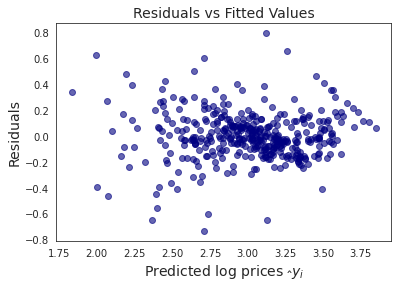

In [ ]:
#residuals разница(ошибка) между true_data и pred_data
# Почему нужна residuals, потому что в ошибках не должно быть закономерности
prices = np.log(data['PRICE'])
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

x_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_const)
results = model.fit()

plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)


plt.xlabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=14)

plt.show()
# Считаем MSE

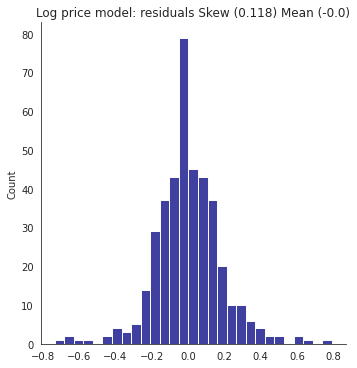

In [ ]:
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.displot(results.resid, color='navy')
plt.title(f'Log price model: residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

#Распределение ошибок

In [ ]:
# Считаем Интервалы

reduced_log_mse = round(results.mse_resid, 3)

print('2 СКО(Сред.Квад.Ошибка) в лог', 2*np.sqrt(reduced_log_mse))

upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
print('The upper bound in normal price is $', np.e**upper_bound * 1000)

lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)
print('The lower bound in normal price is $', np.e**lower_bound * 1000)

2 СКО(Сред.Квад.Ошибка) в лог 0.37416573867739417
The upper bound in normal price is $ 43613.34233239937
The lower bound in normal price is $ 20635.886906824155
